# Random walks

Now we will look at [Random walks](https://en.wikipedia.org/wiki/Random_walk) in n dimensions. This will be the first [Markov Chain Monte Carlo (MCMC)](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) that we will utilize. 

We will keep track of the paths of random walkers and use it to derive the conditions for diffusion in [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). 


The "choice" and "cumsum" strategy here is adapted from [here](https://medium.com/@ensembledme/random-walks-with-python-8420981bc4bc)

In [2]:
import numpy as np
from numpy.random import default_rng # see https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
rng = default_rng()
import matplotlib.pyplot as plt
import tensorflow as tf

### Run the walkers

In [3]:
dims = 3
n_walkers = 1000
n_steps = 5000
t = np.arange(n_steps)
# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]
# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers,n_steps,dims)
# These are the steps at each stage
steps = rng.choice(a=step_set, size=step_shape)
# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1)
print(x.shape)

(1000, 5000, 3)


### Plot the $x$ position of the first 10 walkers

Text(0, 0.5, 'x position')

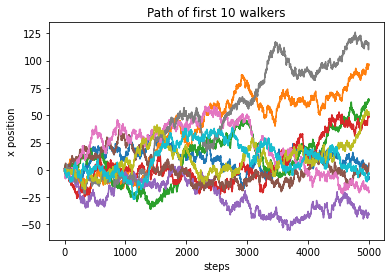

In [4]:
for i in range( min(10,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### Accumulate statistics

Here, we now want to determine the relationship between diffusion and walks. 

We know from lecture that after the $n$th step, each walker will have position

$$
x_n = \sum_{i=1}^n s_i
$$

where $s_i$ is each walkers' step from the `steps` construct above. The average of $s_i$ is zero because they are uniformly chosen from $(-1,0,1)$. However, the standard deviation for each walker is

$$
\left< x_n^2 \right> = \left< \sum_{i=1}^{n} \sum_{j=1}^{n} s_i s_j \right>
$$

$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

If there are $m$ walkers each walking $n$ steps, and the index $k$ iterates over the walkers, then at each step $n$ we have ensemble averages (in 1 dimension):

$$
\left< x_n^4 \right> = \sum_{k=1}^m \frac{x_{k,n}^4}{m}
$$

$$
\left< x_n^2 \right> = \sum_{k=1}^m \frac{x_{k,n}^2}{m}
$$

The overall diffusion width at the $n$th step, taking these ensemble averages, is therefore

$$
\sigma^2_n = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 }
$$

### Homework assignment will go here: 

For 1d, 2d, and 3d:

- Calculate and plot $\sigma^2$ as a function of $n$. 
- Compute a linear fit of $\sigma^2$ as a function of $n$, and also plot that. 
- Compute the diffusion constant $D$ in each of 1d,2d,3d

* As we know the ensemble average folmula for standard deviation of the $<x_n^2>$ in 1D is $\sigma_n^2 = \sqrt{<x_n^4> - <x_n^2>^2} = 2Dn$. 

* While for the 2D, $\sigma_n^2 = 4Dn$ and 3D, $\sigma_n^2 = 6Dn$.

### for 1D

[[0.667 0.654 0.644]
 [1.318 1.399 1.233]
 [2.124 2.008 1.776]
 [2.814 2.563 2.433]
 [3.465 3.22  3.233]
 [4.107 3.99  3.836]
 [4.638 4.763 4.368]
 [5.559 5.545 5.088]
 [6.258 6.092 5.832]
 [6.812 6.746 6.602]]
0.6597015448610086
0.9217015333365406


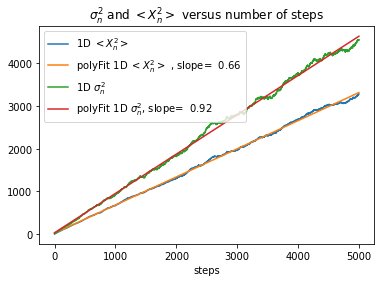

In [5]:
# Now get the averages over the walkers
x2 = np.average( x**2, axis=0 )
print(x2[:10,:3])
x4 = np.average( x**4, axis=0 )
sigma2_nd = np.sqrt( x4 - x2**2 )
sigma2 = np.cumsum( sigma2_nd, axis=1 )
plt.plot(x2[:,0], label = '1D $<X_n^2>$')
res = np.polyfit(t, x2[:,0],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 1D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2_nd[:,0], label = '1D $\sigma_n^2$ ')
res1 = np.polyfit(t, sigma2[:,0],1 )
plt.plot( t, res1[0]*t + res1[1], label='polyFit 1D $\sigma_n^2$, slope=%6.2f' % res1[0] )
print(res1[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()

* As we know $<x_n^2> = \frac{2}{3} n$ in 1D, hence the slop would be equal to 0.67 over the ensamble average. that's what we are getting with some uncertainty. 
* While $\sigma_n^2 = 0.99 n = 2Dn \Rightarrow 2D = 1.00 \Rightarrow D = 0.50$ in 1D  

### In 2D


1.2934908242744214
1.844438505651469


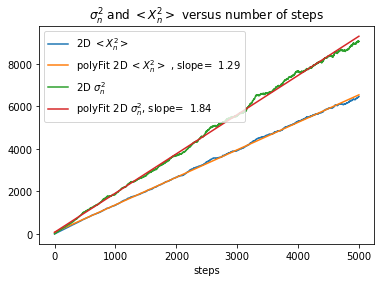

In [6]:
plt.plot(x2[:,0]+x2[:,1], label = '2D $<X_n^2>$')
res = np.polyfit(t, x2[:,0]+x2[:,1],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 2D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2[:,1], label = '2D $\sigma_n^2$ ')
res2 = np.polyfit(t, sigma2[:,1],1 )
plt.plot( t, res2[0]*t + res2[1], label='polyFit 2D $\sigma_n^2$, slope=%6.2f' % res2[0] )
print(res2[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()

* From above we can say that slop of $\sigma_n^2 = 4nD = 1.92D \Rightarrow D = 0.48$.
* Also $<x_n^2> = 4/3 n = 1.33 n $, hence the slop shoud be around 1.33 value, which we are getting.

### In 3D

1.9699575570689964
2.7842110493173546
the value that we are getting for the $\sigma_n^2 = 6nD =$  2.7842110493173546 $n \Rightarrow D = $ 0.46403517488622575
also the $<x_n^2> = 2n$, so slop should be close to 2.00, which is what we are getting


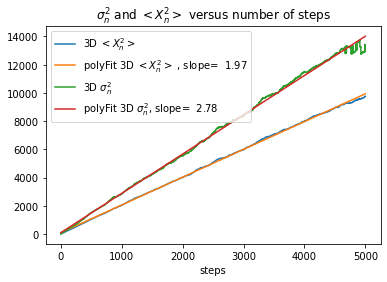

In [7]:
plt.plot(x2[:,0]+x2[:,1] + x2[:,2], label = '3D $<X_n^2>$')
res = np.polyfit(t, x2[:,0]+x2[:,1]+ x2[:,2],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 3D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2[:,2], label = '3D $\sigma_n^2$ ')
res2 = np.polyfit(t, sigma2[:,2],1 )
plt.plot( t, res2[0]*t + res2[1], label='polyFit 3D $\sigma_n^2$, slope=%6.2f' % res2[0] )
print(res2[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()
print('the value that we are getting for the $\sigma_n^2 = 6nD =$ ' ,res2[0] ,'$n \Rightarrow D = $',res2[0]/6.)
print('also the $<x_n^2> = 2n$, so slop should be close to 2.00, which is what we are getting')

### We will try to implement the code for random walk in 1D,2D and 3D using tensorflow module now.

In [8]:
dims_tf = 3
n_walkers_tf = 100
n_steps_tf = 4000
t = np.arange(n_steps_tf)
step_shape = (n_walkers_tf,n_steps_tf,dims_tf)

# I am using tf.random.uniform function to generate random numbers form set {-1,0,1}
steps_tf = tf.random.uniform(shape = step_shape,minval=-1, maxval=2, dtype=tf.dtypes.int32, seed = 0 )

# Now we add up the steps for each walker to get the x positions
x = tf.math.cumsum(steps_tf, axis = 1) 
x2 = tf.math.reduce_mean(x**2,axis = 0)
x4 = tf.math.reduce_mean(x**4,axis = 0)

# variable names are same as in numpy
sigma2_nd = tf.math.sqrt(tf.cast(x4, dtype=tf.float32) - tf.cast(x2, dtype=tf.float32)**2 )
sigma2 = tf.math.cumsum( sigma2_nd, axis=1 )

print(sigma2.shape)


(4000, 3)


### For 1D plot and statistics in tensorflow

Text(0, 0.5, 'x position')

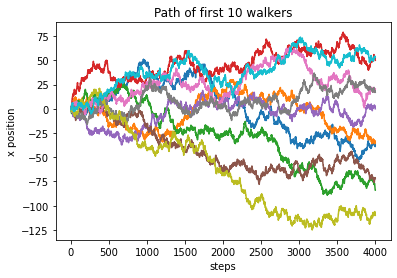

In [9]:
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

0.6005478290967395
0.7945037624981532


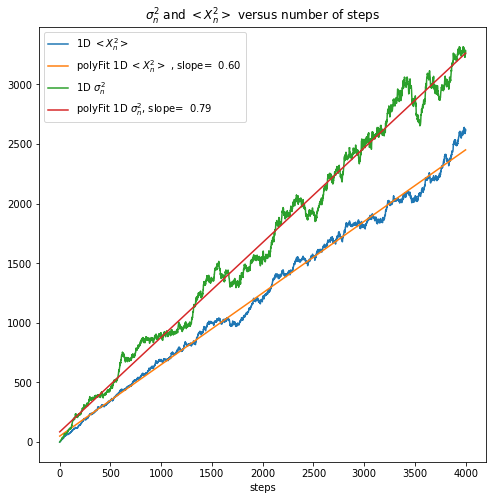

In [10]:
fig = plt.figure(figsize=(8,8))
plt.plot(x2[:,0], label = '1D $<X_n^2>$')
res = np.polyfit(t, x2[:,0],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 1D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2_nd[:,0], label = '1D $\sigma_n^2$ ')
res3 = np.polyfit(t, sigma2_nd[:,0],1 )
plt.plot( t, res3[0]*t + res3[1], label='polyFit 1D $\sigma_n^2$, slope=%6.2f' % res3[0] )
print(res3[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()

### for 2D

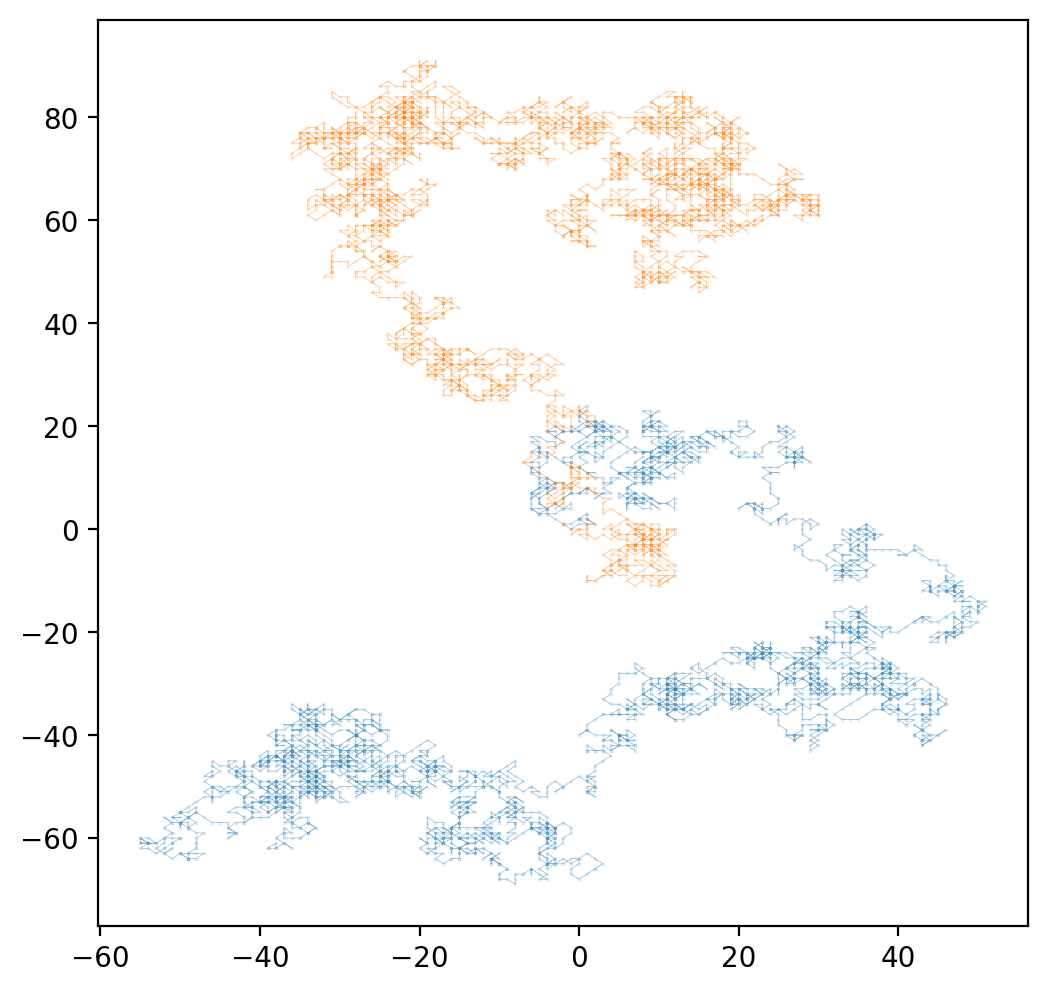

In [11]:
fig = plt.figure(figsize=(6,6),dpi=200)
for i in range( min(2,n_walkers_tf) ):
    plt.scatter(x[i,:,0], x[i,:,1],alpha=0.25,s=0.05)
    plt.plot(x[i,:,0], x[i,:,1],alpha=0.5,lw=0.25,ls='-')
    

1.2163827293364236
nan


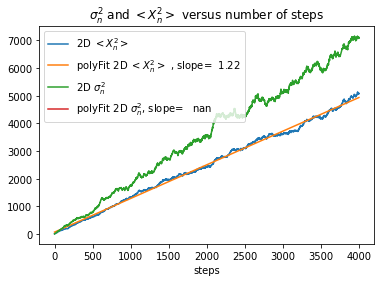

In [13]:
plt.plot(x2[:,0]+x2[:,1], label = '2D $<X_n^2>$')
res = np.polyfit(t, x2[:,0]+x2[:,1],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 2D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2[:,1], label = '2D $\sigma_n^2$ ')
res4 = np.polyfit(t, sigma2[:,1],1 )
plt.plot( t, res4[0]*t + res4[1], label='polyFit 2D $\sigma_n^2$, slope=%6.2f' % res4[0] )
print(res4[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()

### In 3D

In [14]:
fig = plt.figure(figsize=(6,6),dpi=200)
for i in range( min(2,n_walkers_tf) ):
    plt.plot3D(x[i,:,0], x[i,:,1],x[i,:,2],alpha=0.5,lw=0.25,ls='-')

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot3D'

<Figure size 1200x1200 with 0 Axes>

1.9550043148440197
2.5671401331291017
the value that we are getting for the $\sigma_n^2 = 6nD =$  2.5671401331291017 $n \Rightarrow D = $ 0.4278566888548503
also the $<x_n^2> = 2n$, so slop should be close to 2.00, which is what we are getting


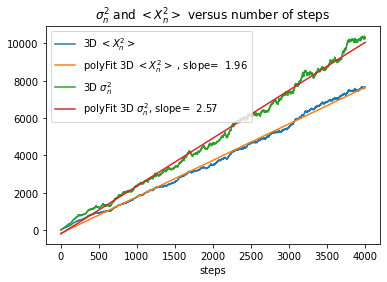

In [21]:
plt.plot(x2[:,0]+x2[:,1] + x2[:,2], label = '3D $<X_n^2>$')
res = np.polyfit(t, x2[:,0]+x2[:,1]+ x2[:,2],1 )
plt.plot( t, res[0]*t + res[1], label='polyFit 3D $<X_n^2>$ , slope=%6.2f' % res[0] )
print(res[0])
plt.plot(sigma2[:,2], label = '3D $\sigma_n^2$ ')
res5 = np.polyfit(t, sigma2[:,2],1 )
plt.plot( t, res5[0]*t + res5[1], label='polyFit 3D $\sigma_n^2$, slope=%6.2f' % res5[0] )
print(res5[0])
plt.title(r"$\sigma_n^2$ and $<X_n^2>$ versus number of steps")
plt.xlabel("steps")
plt.legend()
print('the value that we are getting for the $\sigma_n^2 = 6nD =$ ' ,res5[0] ,'$n \Rightarrow D = $',res5[0]/6.)
print('also the $<x_n^2> = 2n$, so slop should be close to 2.00, which is what we are getting')